### Answers to Assignment 3 of 230E

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Q1

$$E_n(Y_{n+1})=E_n(\hat{\mu}+\hat{\phi_1}Y_{n}+\epsilon_{n+1}+\hat{\theta_1}\epsilon_n+\hat{\theta_2}\epsilon_{n-1})=\hat{\mu}+\hat{\phi_1}Y_{n}+\hat{\theta_1}\epsilon_n+\hat{\theta_2}\epsilon_{n-1}=128.275$$

$$E_n(Y_{n+2})=E_n(\hat{\mu}+\hat{\phi_1}Y_{n+1}+\epsilon_{n+2}+\hat{\theta_1}\epsilon_{n+1}+\hat{\theta_2}\epsilon_{n})=128.005$$

### Q2

(a)

$$\gamma_j=\begin{cases}
(1+\theta_1^2+\theta_2^2)\sigma^2 & j=0\\
(\theta_1 + \theta_2\theta_1) \sigma^2 & j=1\\
\theta_2 \sigma^2 & j=2\\
0 & otherwise
\end{cases}$$
We could observe that for lags > 2, there is no covariance so that $x_t$ is covariance stationary.

(b)

$$Var(\bar{x_T})=\frac{1}{T^2}(\sum_{i=1}^TVar(x_i)+2\sum_{i\neq j}Cov(x_i,x_j))$$
$$=\frac{1}{T^2}(\sigma^2(1+\theta_1^2+\theta_2^2)T+2(T-1)(\theta_1+\theta_2\theta_1)\sigma^2+2(T-2)(\theta_2\sigma^2))$$
$$=\frac{\sigma^2}{T^2}(T(1+\theta_1^2+\theta_2^2+2\theta_1+2\theta_2+2\theta_2\theta_1)-4\theta_2-2\theta_1-2\theta_1\theta_2)$$
$$\lim_{T \rightarrow \infty}{Var(\bar{x_T})}=0$$

(c)

$$E(\sqrt{T}\bar{x_T})=0$$
$$Var(\sqrt{T}\bar{x_T})=\sigma^2(1+\theta_1^2+\theta_2^2+2\theta_1+2\theta_2+2\theta_2\theta_1-\frac{1}{T}(4\theta_2+2\theta_1+2\theta_1\theta_2))$$
$$\lim_{T \rightarrow \infty}{Var(\sqrt{T}\bar{x_T})}=\sigma^2(1+\theta_1^2+\theta_2^2+2\theta_1+2\theta_2+2\theta_2\theta_1)$$

### Q3

(a)

$$y_1=c + \phi y_0 + \epsilon_1$$
$$y_2=c + \phi y_1 + \epsilon_2=c(1 + \phi) + \phi^2 y_0 + \phi \epsilon_1 + \epsilon_2$$
By induction
$$y_t=c\sum_{i=1}^t\phi^{i-1}+\sum_{i=1}^t\phi^{i-1}\epsilon_{t-(i-1)}+\phi^ty_0$$
$$E(y_t)=c\sum_{i=1}^t\phi^{i-1}+\phi^tE(y_0)$$
$$Var(y_t)=\phi^{2t}Var(y_0)+\sum_{i=1}^t\phi^{2i-2}\sigma^2$$
$$Cov(y_t,y_{t+j})=\phi^{2t+j}Var(y_0)+\sum_{i=1}^{t}\phi^{2i-2+j}\sigma^2$$

(b)

Due to $|\phi|<1$
$$\lim_{t\rightarrow \infty}E(y_t)=\lim_{t\rightarrow \infty}c\sum_{i=1}^t\phi^{i-1}+\phi^tE(y_0)=c\frac{1}{1-\phi}=\mu$$

$$\lim_{t\rightarrow \infty}Var(y_t)=\lim_{t\rightarrow \infty}\phi^{2t}Var(y_0)+\sum_{i=1}^t\phi^{2i-2}\sigma^2=\frac{\sigma^2}{1-\phi^2}=\gamma_0$$

$$\lim_{t\rightarrow \infty}Cov(y_t,y_{t+j})=\lim_{t\rightarrow \infty}\phi^{2t+j}Var(y_0)+\sum_{i=1}^{t}\phi^{2i-2+j}\sigma^2$$
$$=\frac{\phi^j}{1-\phi^2}\sigma^2=\gamma_j$$


(c)

$$E(y_t)=c\sum_{i=1}^t\phi^{i-1}+\phi^t\frac{c}{1-\phi}=\frac{1-\phi^t}{1-\phi}c+\phi^t\frac{c}{1-\phi}=\mu <\infty$$
$$Var(y_t)=\phi^{2t}\gamma_0+\sum_{i=1}^t\phi^{2i-2}\sigma^2=\frac{\sigma^2\phi^{2t}}{1-\phi^2}+\frac{1-\phi^{2t}}{1-\phi^2}\sigma^2=\gamma_0 < \infty$$
$$Cov(y_t,y_{t+j})=\frac{\sigma^2\phi^{2t+j}}{1-\phi^2}+\frac{1-\phi^{2t}}{1-\phi^2}\sigma^2\phi^j=\gamma_j$$

We could observe covariance stationarity

### Q4

(a)

In [37]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
def calc_ols(y, lags=1):
    y_lags = []
    for i in range(lags):
        y_lags.append(y[i:len(y)-(lags-i)])
    y_lags = np.array(y_lags).T
    y_ = np.array(y[lags:]).reshape(len(y_lags),1)
    y_lags = np.concatenate((np.ones((len(y_lags), 1)), y_lags), axis=1)
    coef = np.dot(np.dot(np.linalg.inv(np.dot(y_lags.T, y_lags)),y_lags.T),y_)
    residual = y_ - np.dot(y_lags, coef)
    return coef, residual

In [40]:
from statsmodels.tsa.stattools import acf, pacf
phi_poly = np.r_[1, -0.8]
theta_poly = np.r_[1, 0.7]
arma_process = ArmaProcess(phi_poly, theta_poly)
acfs = []
pacfs = []
phis = []
for i in range(1000):
    data = arma_process.generate_sample(1000)
    coef, residual = calc_ols(data, lags=1)
    model_fit = model.fit()
    acfs.append(acf(residual))
    pacfs.append(pacf(residual))
    phis.append(coef[1][0])

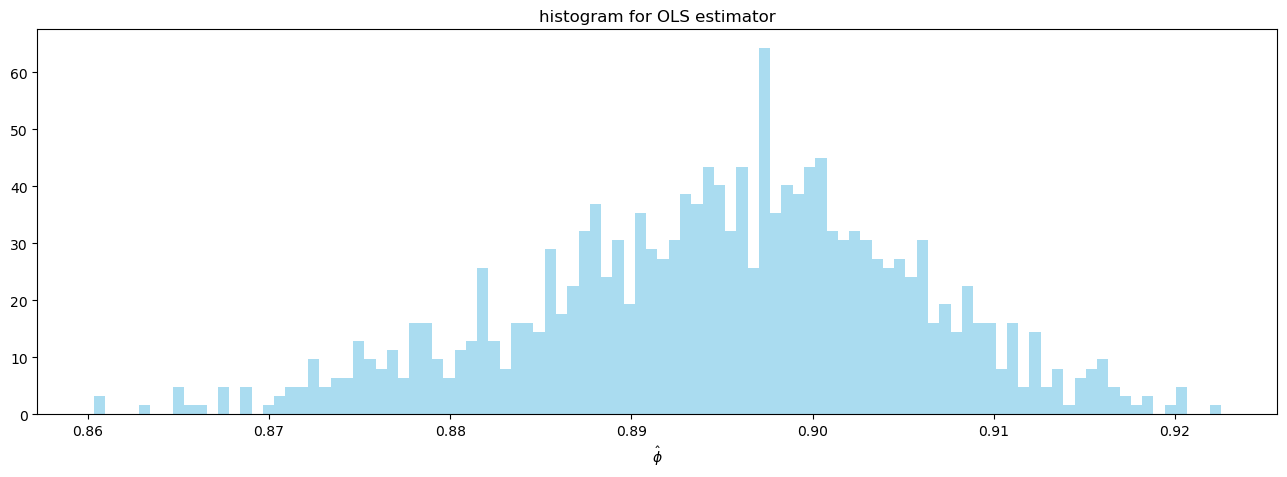

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
axes.hist(phis, 100, density = 1,color ='skyblue',alpha = 0.7, label=r'actual $\hat{\beta}$')
axes.set_title("histogram for OLS estimator")
axes.set_xlabel(r'$\hat{\phi}$')
plt.show()

The $\hat{\phi}$ is not close to true value $\phi=0.8$. This could be due to shock $\epsilon_t$ MA(1)

(b)

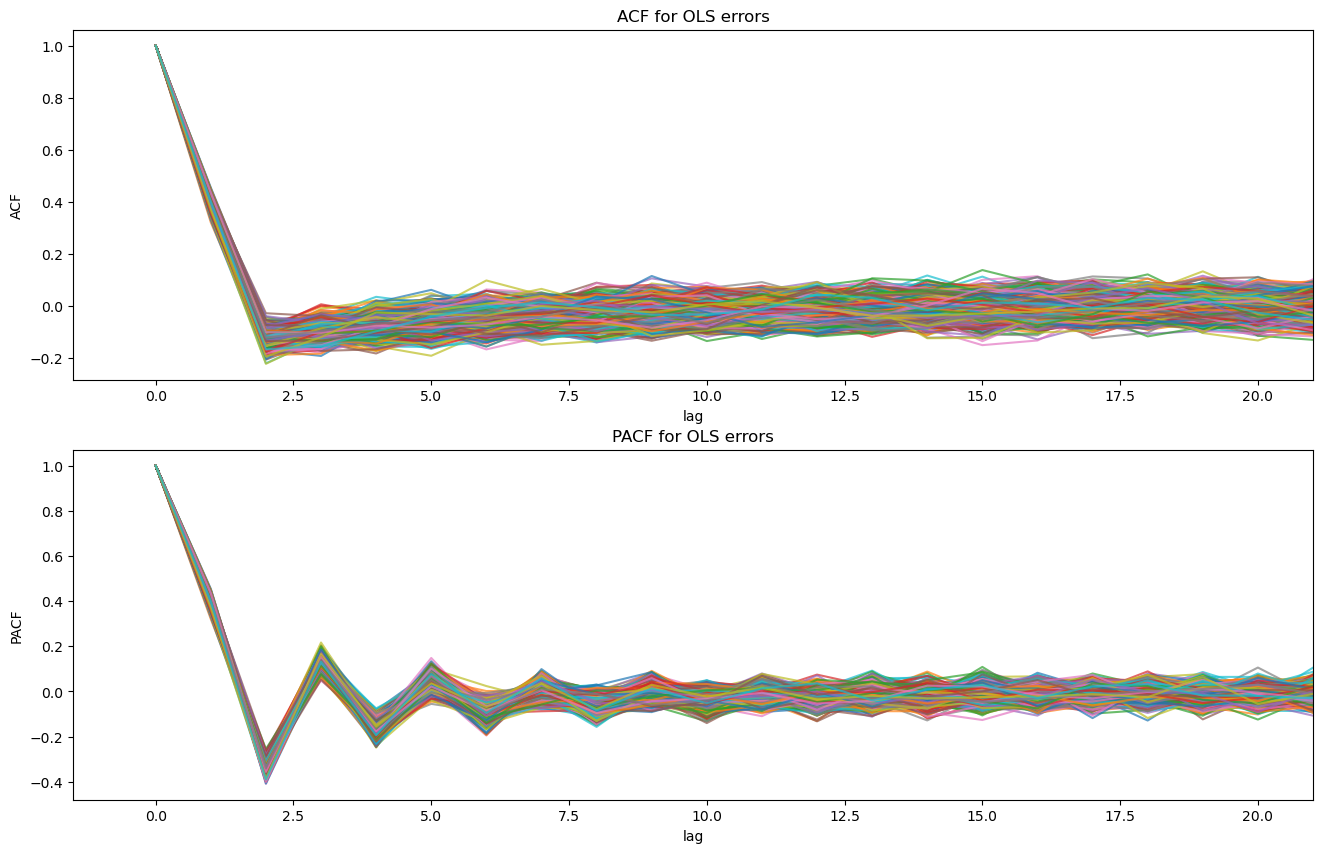

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10))
for i in range(1000):
    axes[0].plot(acfs[i],alpha = 0.7)
    axes[1].plot(pacfs[i],alpha = 0.7)
axes[0].set_xlabel("lag")
axes[0].set_ylabel("ACF")
axes[0].set_title("ACF for OLS errors")
axes[0].axis(xmax=21)
axes[1].set_xlabel("lag")
axes[1].set_ylabel("PACF")
axes[1].set_title("PACF for OLS errors")
axes[1].axis(xmax=21)
plt.show()

We could observe from ACF plot that error autocorrelation dies out at lag=2. And according to PACF, at lag=1, PACF is close to 1 which equals the true $\theta$. 